In [1]:
from manim import *
import math
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching partial_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_Scene"

video_index_scene = " -v WARNING --progress_bar None --disable_caching partial_index_Scene"
image_index_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s partial_index_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.11


Output saved by creating file at animations/partial_differentiation/partial.mp4.


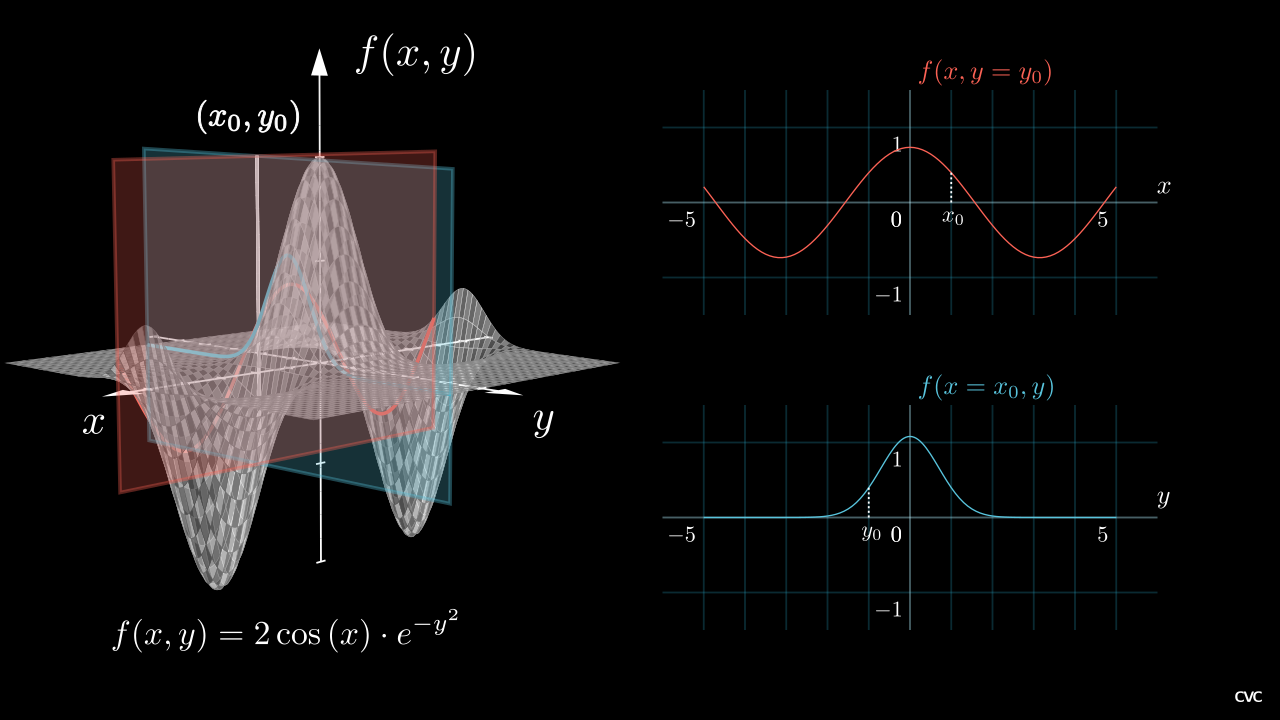

In [97]:
%%capture_video --path "animations/partial_differentiation/partial.mp4"
%%manim -qm --fps 60 $video_scene

class partial_Scene(ThreeDScene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        text_head = Tex(r"Partielle Ableitungen:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT + 0.25 * DOWN)
        text_head_partial_x = Tex(r"$\partial_x f(x,y)\Big|_{x_0,y_0}$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).next_to(text_head, RIGHT)


        # 3D-Coordinate System
        CO3D = [-5, 0.75, -8]
        CO3D_x_range = (-6, 6, 1)
        CO3D_y_range = (-6, 6, 1)
        CO3D_z_range = (-2, 3, 1)
        ax = ThreeDAxes(
            x_range = CO3D_x_range, y_range = CO3D_y_range, z_range = CO3D_z_range,
            x_length = 8, y_length = 8, z_length = 8, axis_config = {'tip_length': 0.05, 'tip_width': 0.3}, 
            z_axis_config = {'color': WHITE},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/20).rotate(
                        axis = [0, 1, 0], angle = PI/20
                        )
        x_lab = Tex('$x$', font_size = 64).move_to(CO3D).shift(1.75*DOWN + 3.5*LEFT)
        y_lab = Tex('$y$', font_size = 64).move_to(CO3D).shift(1.75*DOWN + 3.5*RIGHT)
        z_lab = Tex('$f(x,y)$', font_size = 64).move_to(CO3D + 0.5*RIGHT).shift(4*UP + 1*RIGHT)
        ax_3D = VGroup(ax, x_lab, y_lab, z_lab)


        # f(x,y) surface plane
        def param_surface(x, y):
            z = 2 * np.cos(x) * np.exp(-y**2)
            return np.array([x, y, z])

        def param_surface_ax(x, y):
            return ax.c2p(x, y, param_surface(x, y)[2])

        resolution_fa = 64
        surface_plane = Surface(
            param_surface_ax,
            resolution = (resolution_fa, resolution_fa),
            v_range=[-5, +5],
            u_range=[-5, +5]
            )
        surface_plane.set_style(fill_opacity = 1, stroke_color = GREY)
        surface_plane.set_fill_by_checkerboard(GREY, WHITE, opacity = 0.5)
        surface_eq1 = MathTex(r'f(x,y)=2\cos{(x)}\cdot e^{-y^2}', font_size = 36).align_on_border(LEFT + DOWN).shift(0.25*UP + 0.75*RIGHT)


        # planes
        x0 = 1
        y0 = -1

        coord_line = Line3D(ax.c2p(x0, y0, CO3D_z_range[0]+1), ax.c2p(x0, y0, CO3D_z_range[1]-1), color = WHITE)
        coord_label = MathTex(r'(x_0, y_0)', font_size = 36, stroke_width = 1, color = WHITE).move_to([-4.35, 2.7, 0])
        y0_plane = Polygon(
            ax.c2p(CO3D_x_range[0]+1, y0, CO3D_z_range[0]+1), 
            ax.c2p(CO3D_x_range[0]+1, y0, CO3D_z_range[1]-1), 
            ax.c2p(CO3D_x_range[1]-1, y0, CO3D_z_range[1]-1), 
            ax.c2p(CO3D_x_range[1]-1, y0, CO3D_z_range[0]+1),
            color = RED, fill_opacity = 0.25, stroke_opacity = 0.35)
        x0_plane = Polygon(
            ax.c2p(x0, CO3D_y_range[0]+1, CO3D_z_range[0]+1), 
            ax.c2p(x0, CO3D_y_range[0]+1, CO3D_z_range[1]-1), 
            ax.c2p(x0, CO3D_y_range[1]-1, CO3D_z_range[1]-1), 
            ax.c2p(x0, CO3D_y_range[1]-1, CO3D_z_range[0]+1),
            color = BLUE, fill_opacity = 0.25, stroke_opacity = 0.35)


        # curves for constant x = x0 and y = y0
        def curve_4_y0(y0):
            def y0_curve(x):
                return ax.c2p(x, y0, param_surface(x, y0)[2])
            return ParametricFunction(y0_curve, color = RED, t_range = np.array([-5, 5, 0.01])).set_shade_in_3d(True)


        def curve_4_x0(x0):
            def x0_curve(y):
                return ax.c2p(x0, y, param_surface(x0, y)[2])
            return ParametricFunction(x0_curve, color = BLUE, t_range = np.array([-5, 5, 0.01])).set_shade_in_3d(True)



        
        y0_para_curve = curve_4_y0(y0)
        x0_para_curve = curve_4_x0(x0)


        # 2D-Coordinate Sytem for each coordinate
        origin_x = [3, 1.75, 0]
        origin_y = [3, -1.75, 0]
        x_length = 5.5
        y_length = 2.5
        x_range = [-6, 6, 1]
        x_dict_x0 = dict(zip([-5, 0, 5, x0+0.5], [-5, 0, 5, r"$x_0$"]))
        x_dict_y0 = dict(zip([-5, 0, 5, y0+0.5], [-5, 0, 5, r"$y_0$"]))

        # x(t) system
        y_range_x = [-1.5, 1.5, 1]                          
        y_dict_x = dict(zip([-1, 0, 1], [-1, 0, 1]))
        npla_x = NumberPlane(
            x_range = x_range, y_range = y_range_x, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25, "label_direction": DL}, y_axis_config = {"label_direction": DL}, 
            background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin_x).add_coordinates(x_dict_x0, y_dict_x)#.set_color(BLUE)
        npla_xlabel_x = npla_x.get_x_axis_label(Tex(r"$x$", font_size = 28)).shift(0.1 *LEFT)
        npla_ylabel_x = npla_x.get_y_axis_label(Tex(r"$f(x, y=y_0)$", font_size = 28, color = RED))#.shift(1.05 * LEFT + 0.15 * DOWN)
        npla_ylabel_x_ext = Tex(r"$=~2\cos{(t)}$", font_size = 28, color = RED).next_to(npla_ylabel_x, RIGHT)
        npla_x_group = VGroup(npla_x, npla_xlabel_x, npla_ylabel_x)

        # y(t) system
        y_range_y = [-1.5, 1.5, 1]                          
        y_dict_y = dict(zip([-1, 0, 1], [-1, 0, 1]))
        npla_y = NumberPlane(
            x_range = x_range, y_range = y_range_y, x_length = x_length, y_length = y_length, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25, "label_direction": DL}, y_axis_config = {"label_direction": DL}, 
            background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin_y).add_coordinates(x_dict_y0, y_dict_y)
        npla_xlabel_y = npla_y.get_x_axis_label(Tex(r"$y$", font_size = 28)).shift(0.1 *LEFT)
        npla_ylabel_y = npla_y.get_y_axis_label(Tex(r"$f(x=x_0,y)$", font_size = 28, color = BLUE))#.shift(1.05 * LEFT + 0.15 * DOWN)
        npla_ylabel_y_ext = Tex(r"$=~\sin{(t)}$", font_size = 28, color = BLUE).next_to(npla_ylabel_y, RIGHT)
        npla_y_group = VGroup(npla_y, npla_xlabel_y, npla_ylabel_y)


        # 2D curves for constant x = x0 and y = y0
        y0_func = npla_x.plot(lambda x_var: param_surface(x_var, y0)[2], color = RED, stroke_width = 1.5, stroke_opacity = 1, x_range = [-5, 5])
        x0_func = npla_y.plot(lambda y_var: param_surface(x0, y_var)[2], color = BLUE, stroke_width = 1.5, stroke_opacity = 1, x_range = [-5, 5])
        y0_func_x0 = DashedLine(npla_x.c2p(x0, param_surface(x0, y0)[2]), npla_x.c2p(x0, 0), color = WHITE, dash_length = 0.025, dashed_ratio = 0.5, stroke_width = 2)
        x0_func_y0 = DashedLine(npla_y.c2p(y0, param_surface(x0, y0)[2]), npla_y.c2p(y0, 0), color = WHITE, dash_length = 0.025, dashed_ratio = 0.5, stroke_width = 2)


        #self.add(text_head)#, text_head_partial_x)
        self.add(ax_3D)
        self.add(surface_plane)
        self.add(surface_eq1)
        self.add(npla_x_group, npla_y_group)

        self.add(x0_para_curve, y0_para_curve)
        self.add(x0_plane, y0_plane)
        self.add(coord_line, coord_label)
        self.add(y0_func, x0_func, y0_func_x0, x0_func_y0)